<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Предварительный-анализ-полученных-данных" data-toc-modified-id="Предварительный-анализ-полученных-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предварительный анализ полученных данных</a></span></li><li><span><a href="#Вывод-по-данным" data-toc-modified-id="Вывод-по-данным-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод по данным</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Обоснование,-почему-качество-линейной-регрессии-не-поменяется." data-toc-modified-id="Обоснование,-почему-качество-линейной-регрессии-не-поменяется.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обоснование, почему качество линейной регрессии не поменяется.</a></span></li></ul></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обработка данных</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Предварительный-вывод-по-шифрованию-данных" data-toc-modified-id="Предварительный-вывод-по-шифрованию-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Предварительный вывод по шифрованию данных</a></span></li><li><span><a href="#Таблица-с-полученными-результатами" data-toc-modified-id="Таблица-с-полученными-результатами-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Таблица с полученными результатами</a></span></li><li><span><a href="#Вывод-о-проделанной-работе" data-toc-modified-id="Вывод-о-проделанной-работе-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод о проделанной работе</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
# скачаем требуемые в работе модули

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from IPython.display import Image


In [2]:
#Назначим константу для random_state
RANDOM_STATE = 0

In [3]:
# Загрузим таблицу:
try:
    data = pd.read_csv('insurance.csv')
except:
    data = pd.read_csv('/datasets/insurance.csv') # если работа ведется в Яндекс Практикум

In [4]:
# Рассмотрим и проверим данные

data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропуски не обнаружены, возраст и зарплата сохранены в формате float, необходимо будет перевести в формат целого цисла для удобства и сохранения места на диске.

In [6]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


array([[<AxesSubplot:title={'center':'Пол'}>,
        <AxesSubplot:title={'center':'Возраст'}>],
       [<AxesSubplot:title={'center':'Зарплата'}>,
        <AxesSubplot:title={'center':'Члены семьи'}>],
       [<AxesSubplot:title={'center':'Страховые выплаты'}>,
        <AxesSubplot:>]], dtype=object)

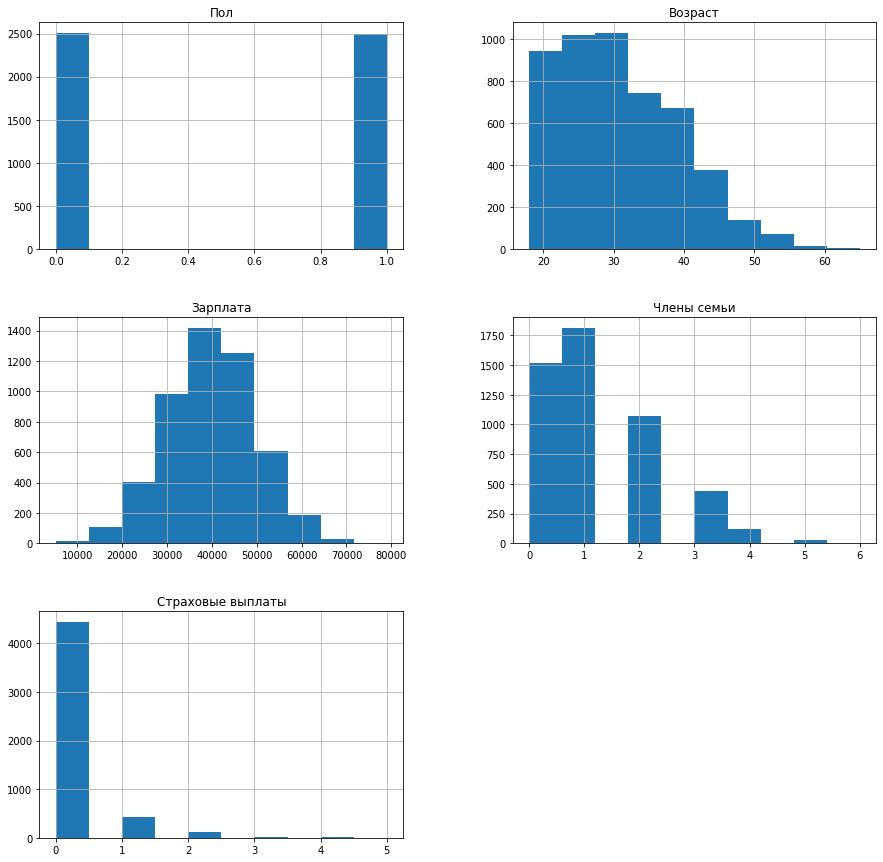

In [7]:
data.hist(figsize=(15, 15))

Минимальный возраст - 18 лет, максимальный - 65, выглядит логично. Большая часть клиентов от 20 до 30 лет. Средняя зарплата в районе 35-42 тысяч. Членов семьи от нуля до шести, что также допустимо. 

Можно говорить о том, что выбросов не обнаружено.

In [8]:
# Проверим данные на дубликаты

print("Количество дубликатов в таблице:", data.duplicated().sum())

Количество дубликатов в таблице: 153


Обнаружено 153 дубликата, необходимо будет их убрать.

### Предварительный анализ полученных данных

- Пропусков не обнаружено,
- Данные не содержат выбросы,
- Два поля хранят информацию в формате float, но будет логично заменить на формат int,
- Обнаружены дубликаты, которые необходимо убрать.

In [9]:
# Переведем столбцы "Возраст" и "Зарплата" в формат целого числа.

data['Возраст'] = data['Возраст'].astype('int')
data['Зарплата'] = data['Зарплата'].astype('int')

# Проверим работу кода
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [10]:
# Удалим дубликаты
data = data.drop_duplicates().reset_index(drop=True)

# Проверим работу кода
print("Количество дубликатов в таблице:", data.duplicated().sum())

Количество дубликатов в таблице: 0


### Вывод по данным

- Были обработаны столбцы "Возраст" и "Зарплата" с изменением формата данных,
- Были удалены явные дубликаты.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

В данном проекте обязательно нужно сделать теоретическое доказательство.
    
Нужно доказать, что $a_1 = a$, где $a_1 = X_1 w_1$ — предсказания на зашифрованных признаках.
    
$X_1 = XP$ — матрица зашифрованных признаков.
    
Удобнее всего преобразовать выражение для $w_1$, подставив туда матрицы признаков $X_1$. 
    
При доказательстве в выражении $(X^T X)^{-1}$ нельзя раскрывать скобки, так как матрицы $X$ и $X^T$ прямоугольные и для них не существует обратных матриц, то есть нельзя записывать $(X^T)^{-1}$ и $X^{-1}$.
    
Необходимо учитывать формулы матричных операций:
    
$(AB)^T = B^T A^T$; $(AB)^{-1} = B^{-1}A^{-1}$; $AE = EA = A $    
    
Сначала нужно раскрыть скобки в операции транспонирования $(XP)^T$, а затем извлечь из-за скобок матрицы $P$ и $P^T$, а выражение $(X^T X)^{-1}$ оставить без изменений.


### Обоснование, почему качество линейной регрессии не поменяется.

1 - Представим новую матрицу признаков $X_1$ как произведение старой $X$ на матрицу $P$(обратимую), то есть матрицу зашифрованных признаков:
$$ X_1=XP $$

2 - Подставим новое значение $X_1$ в формулу $w_1$:
$$ w_1 = ((XP)^T XP)^{-1} (XP)^T y $$

3 - Раскроем первое произведение $(XP)^T$:
$$ w_1 = (P^TX^T XP)^{-1} P^TX^T y $$

4 - Перегруппируем множители в скобках, чтобы это выглядело как произведение трех множителей:
$$ w_1 = (P^T(X^T X)P)^{-1} P^TX^T y $$

5 - Раскроем скобки $ (P^T(X^T X)P)^{-1} $:
$$ w_1 = P^{-1}(X^T X)^{-1} (P^T)^{-1}P^TX^T y $$

6 - Так как $P$ по условию обратимая, то произведение $(P^T)^{-1}P^T$ равно $E$ (единичная матрица):
$$ w_1 = P^{-1}(X^T X)^{-1} EX^T y = P^{-1}(X^T X)^{-1} X^T y $$

7 - Можно заметить, что справа получилась формула для $w$:
$$ w_1 = P^{-1}(X^T X)^{-1} X^T y = P^{-1}w $$

8 - Подставим новое значение весов $w_1$ в формулу для предсказаний линейной регрессии. Предсказания модели расчитываются по формуле:
$$ a = Xw $$

9 - Подставим в эту формулу значения $X_1$ и $w_1$ для того, чтобы на их основе вычислить предсказания модели $a_1$:
$$ a_1 = X_1w_1 = XPP^{-1}w $$

10 - Так как $P$ по условию обратимая, то произведение $PP^{-1}$ снова равно единичной матрице $E$:
$$ a_1 = XPP^{-1}w = XEw = Xw = a $$

Мы доказали, что предсказания $a_1$ для матрицы признаков, умноженных на обратимую матрицу $P$ равны предсказаниям $a$. Следовательно, отвечая на вопрос изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу, можно утверждать, что не изменится. В данном случае, параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w_1$ связаны следующим образом: 
$$ w_1 = P^{-1}w $$


## Обработка данных

In [11]:
# Разделим данные на признаки и целевую выборку
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

In [12]:
# Создадим тренировочный и тестовый датасеты
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

In [13]:
# Проверим результаты

print('Размер тренировочного датасета - {:.0%}'.format(
    features_train.shape[0]/features.shape[0]))
print('Размер тестового датасета - {:.0%}'.format(
    target_test.shape[0]/target.shape[0]))

Размер тренировочного датасета - 75%
Размер тестового датасета - 25%


## Алгоритм преобразования

**Алгоритм**

Для защиты данных мы будем умножать матрицу признаков на обратимую матрицу, которая будет генерироваться случайно.

**Обоснование**



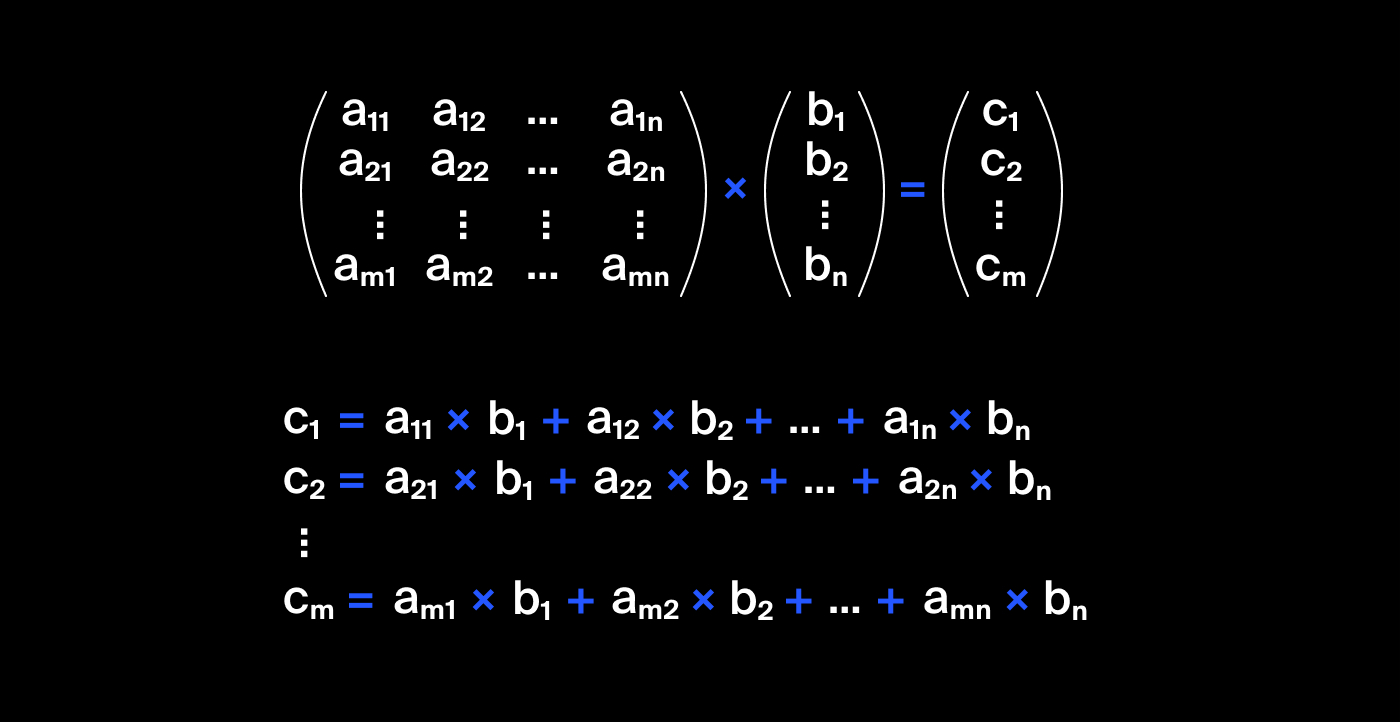

## Проверка алгоритма

In [15]:
# Инициализация модели линейной регрессии без масштабирования

model = LinearRegression()
model.fit(features_train, target_train)
print("R2 =", r2_score(target_test, model.predict(features_test)))


R2 = 0.41145126195254345


In [16]:
# Инициализация модели линейной регрессии c масштабированием
# Используем пайплайн для поочередного запуска скалера и регрессора

lr = LinearRegression()
ss = StandardScaler()
pipeline = Pipeline([("standard_scaler", ss),("linear_regression", lr)])
pipeline.fit(features_train, target_train)
print("R2 =", r2_score(target_test, pipeline.predict(features_test)))

R2 = 0.41145126195254345


Разница получилась очень незначительной.

In [17]:
# Создадим матрицу, содержающую случайные значения

n = features.shape[1]
random_matrix = np.random.randint(1, 10, (n, n))

#Признаки защищенные

encrypted_features = features @ random_matrix

# Проверим работу кода
print(np.linalg.inv(random_matrix))

[[-0.31746032  0.17460317  0.17460317 -0.12698413]
 [-0.32275132  0.22751323 -0.10582011  0.13756614]
 [ 0.3015873  -0.01587302 -0.01587302 -0.07936508]
 [ 0.26455026 -0.31216931  0.02116402  0.10582011]]


In [18]:
# Сравним исходные данные и обработанные

display(features.head())
display(features.shape)
display(encrypted_features.head())
display(encrypted_features.shape)


,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


(4847, 4)

,0,1,2,3
0,446571,297858,397141,446535
1,342189,228285,304375,342147
2,189116,126174,168232,189087
3,375394,250344,333782,375381
4,235014,156771,209030,234987


(4847, 4)

### Предварительный вывод по шифрованию данных

Можно заметить, что теперь в новом формате данные отображаются в виде новых чисел, но размеры таблиц сохранились.

In [19]:
# Создадим из зашифрованных данных тренировочный и тестовый датасеты

features_train_enc, features_test_enc, target_train_enc, target_test_enc = train_test_split(
    encrypted_features, target, test_size=0.25, random_state=RANDOM_STATE)

In [20]:
# Инициализация модели линейной регрессии без масштабирования для зашифрованных данных

model = LinearRegression()
model.fit(features_train_enc, target_train_enc)
print("R2 =", r2_score(target_test_enc, model.predict(features_test_enc)))

R2 = 0.4114512619525049


In [21]:
# Инициализация модели линейной регрессии c масштабированием для зашифрованных данных
# Используем пайплайн для поочередного запуска скалера и регрессора

lr = LinearRegression()
ss = StandardScaler()
pipeline = Pipeline([("standard_scaler", ss),("linear_regression", lr)])
pipeline.fit(features_train_enc, target_train_enc)
print("R2 =", r2_score(target_test_enc, pipeline.predict(features_test_enc)))

R2 = 0.41145126195253223


### Таблица с полученными результатами

| Вид обработки                             | Результат R2             |
|-------------------------------------------|--------------------------|
| Исходные данные без масштабирования       | R2 = 0.41145126195254345 |
| Исходные данные c масштабированием        | R2 = 0.41145126195254356 |
| Закодированные данные без масштабирования | R2 = 0.4114512619525452  |
| Закодированные данные c масштабированием  | R2 = 0.41145126195254456 |

По результатам в таблице можно заметить, что отличия в R2 есть, но они начинаются после 13-ой цифры от запятой.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования